In [12]:
import numpy as np
import tensorflow as tf
import math
from skimage.transform import resize
from PIL import Image
import h5py
from tensorflow.python.framework import ops
import scipy
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import ndimage
import os
import cv2
import random
from sklearn.utils import shuffle
import pickle as pkl

In [13]:
np.random.seed(1)
x=np.random.rand(4)
np.random.seed(1)
y=np.random.rand(4)
print(x)
print(y)

[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01]
[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01]


In [14]:
def one_hot_encode(y,n_labels):
    return np.eye(n_labels)[y]

In [15]:
def load_dataset(isSave):
    
    # isSave will be true when we want to save the data in pkl and will be false when 
    # we want to get the data from pkl
    if isSave:
        classes=os.listdir("leaf_dataset")

        n_class=len(classes)
        samples_per_class=16
        image_width=50 # width of image
        image_height=50 # height of image
        n_channel=1 # number of channels
        m=n_class*samples_per_class # Number of samples))

        train_ratio=0.7
        validation_ratio=0.2
        test_ratio=0.1

        ntraining_samples=int(samples_per_class*train_ratio)
        nvalidation_samples=int(samples_per_class*validation_ratio)
        ntest_samples=samples_per_class-ntraining_samples-nvalidation_samples
        

        print("m",m)
        print("classes",len(classes))
        print("ntraining_samples",ntraining_samples)
        print("nvalidation_samples",nvalidation_samples)
        print("ntest_samples",ntest_samples)

        x_train_set=np.zeros((ntraining_samples*n_class,image_width,image_height,n_channel),dtype=np.float32)
        x_validation_set=np.zeros((nvalidation_samples*n_class,image_width,image_height,n_channel),dtype=np.float32)
        x_test_set=np.zeros((ntest_samples*n_class,image_width,image_height,n_channel),dtype=np.float32)

        y_train_set=np.zeros((ntraining_samples*n_class),dtype=int)
        y_validation_set=np.zeros((nvalidation_samples*n_class),dtype=int)
        y_test_set=np.zeros((ntest_samples*n_class),dtype=int)

        train_count=0
        test_count=0
        validation_count=0
        
        print("Data is Saving .....")

        for count,class_name in enumerate(classes):
            class_name_path="leaf_dataset/"+class_name+"/"

            images=os.listdir(class_name_path);
            random.shuffle(images)

            train_images=images[:ntraining_samples]
            validation_images=images[ntraining_samples:ntraining_samples+nvalidation_samples]
            test_images=images[ntraining_samples+nvalidation_samples:]

#             print("train_images",train_images)
#             print("validation_images",validation_images)
#             print("test_images",test_images)

            # Filling training set
            for image_name in train_images:
    #             print("image_name",image_name)
                image=img.imread(class_name_path+image_name)
    #             print(image.shape)
                image=cv2.resize(image, dsize=(image_height,image_width), interpolation=cv2.INTER_CUBIC).reshape(image_height,image_width,n_channel)/255
    #             print(image.shape)
                x_train_set[train_count]=image
                y_train_set[train_count]=count
                train_count+=1

            # Filling validation set
            for image_name in validation_images:
    #             print("image_name",image_name)
                image=img.imread(class_name_path+image_name)
    #             print(image.shape)
                image=cv2.resize(image, dsize=(image_height,image_width), interpolation=cv2.INTER_CUBIC).reshape(image_height,image_width,n_channel)/255
    #             print(image.shape)
                x_validation_set[validation_count]=image
                y_validation_set[validation_count]=count
                validation_count+=1

            # Filling test set
            for image_name in test_images:
    #             print("image_name",image_name)
                image=img.imread(class_name_path+image_name,)
    #             print(image.shape)
                image=cv2.resize(image, dsize=(image_height,image_width), interpolation=cv2.INTER_CUBIC).reshape(image_height,image_width,n_channel)/255
    #             print(image.shape)
                x_test_set[test_count]=image
                y_test_set[test_count]=count
                test_count+=1

#         print(len(classes))
    #     np.set_printoptions(threshold=np.inf)
#         print("y_train_set",y_train_set.shape,y_train_set)
#         print("y_validation_set",y_validation_set.shape,y_validation_set)
#         print("y_test_set",y_test_set.shape,y_test_set)

        x_train_set,y_train_set = shuffle(x_train_set,y_train_set, random_state=0) # This shuffles two array altoghether 
        x_validation_set,y_validation_set = shuffle(x_validation_set,y_validation_set, random_state=0)
        x_test_set,y_test_set = shuffle(x_test_set,y_test_set, random_state=0)
        
        with open("xy_train_set.pkl",'wb') as f:
            print(x_train_set.dtype)
            pkl.dump((x_train_set,y_train_set),f)
            
        with open("xy_validation_set.pkl",'wb') as f:
            pkl.dump((x_validation_set,y_validation_set),f)
            
        with open("xy_test_set.pkl",'wb') as f:
            pkl.dump((x_test_set,y_test_set),f)
        print("Data saved successfully")
        return x_train_set,y_train_set,x_validation_set,y_validation_set,x_test_set,y_test_set
            
    else:       
        with open("xy_train_set.pkl",'rb') as f:
            x_train_set,y_train_set=pkl.load(f)
        
        with open("xy_validation_set.pkl",'rb') as f:
            x_validation_set,y_validation_set=pkl.load(f)
            
        with open("xy_test_set.pkl",'rb') as f:
            x_test_set,y_test_set=pkl.load(f)
        
        print("Data loaded successfully")
        return x_train_set,y_train_set,x_validation_set,y_validation_set,x_test_set,y_test_set


In [16]:
x_train_set,y_train_set,x_validation_set,y_validation_set,x_test_set,y_test_set=load_dataset(isSave=False)
# print(x_train_set,y_train_set,x_validation_set,y_validation_set,x_test_set,y_test_set)

Data loaded successfully


In [17]:
m,image_height,image_width,n_channel=x_train_set.shape

n_labels=100
print(image_height,image_width,n_channel,n_labels,x_train_set.dtype,x_test_set.dtype,x_validation_set.dtype)

50 50 1 100 float32 float32 float32


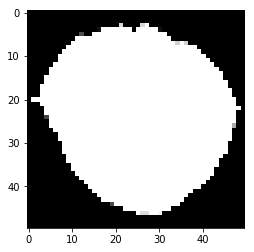

In [18]:
plt.imshow(x_train_set[0].reshape(image_height,image_width),cmap=plt.get_cmap('gray'))

In [19]:
# Applying hot_encode to every y array of training set,validation test and test set

print(type(y_train_set))
y_train_set=one_hot_encode(y_train_set,n_labels)
y_validation_set=one_hot_encode(y_validation_set,n_labels)
y_test_set=one_hot_encode(y_test_set,n_labels)
print(y_train_set.shape)

<class 'numpy.ndarray'>
(1100, 100)


In [20]:
x=tf.placeholder(tf.float32,shape=[None,image_height,image_width,n_channel])
y=tf.placeholder(tf.float32,shape=[None,n_labels])
drop_prob=tf.placeholder(tf.float32)

In [21]:
def initialize_weight(shape):
    init_random_weight=tf.truncated_normal(shape,stddev=1.0)
    return tf.Variable(init_random_weight)

def initialize_bias(shape):
    init_random_bias=tf.constant(0.1,shape=shape) # initialize all the weights with 0.1
    return tf.Variable(init_random_bias)

def conv2d(x,w):
    return tf.nn.conv2d(x,w,strides=[1,1,1,1],padding="SAME")

def max_pooling_2d(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")

def convolution_layer(input_x,shape):
    w=initialize_weight(shape)
    b=initialize_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x,w)+b)

def normal_full_layer(input_layer,size):
    input_size=int(input_layer.get_shape()[1]) # getting the number of neuron unit in next layer
    w=initialize_weight([input_size,size])
    b=initialize_bias([size])
    return tf.matmul(input_layer,w)+b
    
    

In [24]:
# Model
print(x)
# Layer 1
convo_1=convolution_layer(x,shape=[5,5,1,32])
max_pooling_1=tf.nn.max_pool(convo_1,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")

# Layer 2
convo_2=convolution_layer(max_pooling_1,shape=[5,5,32,48])
max_pooling_2=tf.nn.max_pool(convo_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")

# Layer 3
convo_3=convolution_layer(max_pooling_2,shape=[5,5,48,64])
max_pooling_3=tf.nn.max_pool(convo_3,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
last_shape=max_pooling_3.get_shape()
print(last_shape)

#Flattening
convo_3_flat=tf.reshape(max_pooling_3,[-1,last_shape[-1]*last_shape[-2]*last_shape[-3]])

#Fully connected layer 1
full_layer_one=tf.nn.relu(normal_full_layer(convo_3_flat,1024))

# dropout
full_one_dropout=tf.nn.dropout(full_layer_one,keep_prob=drop_prob)

#Final layer
output_layer=normal_full_layer(full_one_dropout,n_labels)
y_predict=output_layer

Tensor("Placeholder:0", shape=(?, 50, 50, 1), dtype=float32)
(?, 7, 7, 64)


In [25]:
# Loss function
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=y_predict))


In [26]:
# Optimizer
optimizer=tf.train.AdamOptimizer(learning_rate=0.001)
train=optimizer.minimize(cross_entropy)

In [31]:
init=tf.global_variables_initializer()

In [32]:
def next_batch(i,batch_size):
    batch_x=x_train_set[i:i+batch_size]
    batch_y=y_train_set[i:i+batch_size]
    return batch_x,batch_y

In [ ]:
steps=500
batch_size=50
with tf.Session() as sess:
    sess.run(init)
    for i in range(steps):
        batch_x,batch_y=next_batch(i,batch_size)
        i=(i+batch_size)/m
        sess.run(train,feed_dict={x: batch_x,y:batch_y,drop_prob:0.5})
        if i%batch_size==0:
            print("Step : {}".format(i))
            print("Accuracy")
            matches=tf.equal(tf.argmax(y_predict,1),tf.argmax(y,1))
            accuracy=tf.reduce_mean(tf.cast(matches,tf.float32))
            print(sess.run(accuracy,feed_dict={x:x_test_set,y:y_test_set,drop_prob:1.0}))
            print("\n")
        
        

In [8]:
l=[[1,2],[3,4,4],[5,6,6]]
l[1:8]

[[3, 4, 4], [5, 6, 6]]

In [136]:
a=np.divide(a,3)

In [137]:
a


array([0.33333333, 0.66666667, 1.        , 1.33333333])